# Precise Wikipedia Views Analysis

## Data import

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Data loading


    ja -> Japanese
    it -> Italian
    da -> Danish
    tr -> Turkish?
    no -> Norwegian
    en -> English
    sr -> Serbian
    sv -> Swedish
    nl -> Dutch
    de -> German
    fr -> French
    ca -> Catalan?
    ko -> Korean
    fi -> Finnish

In [171]:
languages = ['ja', 'it', 'da', 'tr', 'no', 'en', 'sr', 'sv', 'nl', 'de', 'fr', 'ca', 'ko', 'fi']

In [168]:
def process_wikiviews_data(path, columns_to_keep=None):
    data = pd.read_csv(path).transpose()
    data.columns = data.iloc[0]
    titles = data.iloc[1]
    data.drop(['Language', 'Title', 'Badges'], inplace=True)

    if columns_to_keep is None:
        columns_to_keep = data.columns

    columns = data.columns.intersection(columns_to_keep)
    data = data[columns]

    data['total'] = data.sum(axis=1)
    data['date'] = data.index
    data['date'] = pd.to_datetime(data['date'])

    return titles, data

#### Air Pollution

In [172]:
airpol_titles, airpol_data = process_wikiviews_data('Data/page-views-airpol.csv', languages)
airpol_data

Language,en,fr,it,ja,de,sr,tr,nl,ko,ca,sv,fi,no,da,total,date
2019-01-01,4685,1436,143,61,91,13,15,39,9,13,2,12,1,3,6523.0,2019-01-01
2019-01-02,6652,1539,393,94,147,18,7,28,17,24,6,14,3,1,8943.0,2019-01-02
2019-01-03,7880,1429,444,123,110,40,10,56,16,28,11,8,3,2,10160.0,2019-01-03
2019-01-04,7843,1394,410,155,188,17,7,36,4,32,2,11,13,3,10115.0,2019-01-04
2019-01-05,5876,1098,388,193,122,38,1,44,4,22,2,8,3,3,7802.0,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,3591,283,74,163,48,55,76,49,51,37,5,6,0,2,4440.0,2022-11-04
2022-11-05,3234,271,80,42,46,49,70,29,17,15,3,3,4,0,3863.0,2022-11-05
2022-11-06,3841,369,81,75,59,73,156,34,31,25,5,7,1,0,4757.0,2022-11-06
2022-11-07,3952.0,264.0,143.0,176.0,86.0,87.0,108.0,50.0,57.0,56.0,9.0,9.0,2.0,0.0,4999.0,2022-11-07


#### Plastic Industry

In [173]:
plastin_titles, plastin_data = process_wikiviews_data('Data/plasticIndustry.csv', languages)
plastin_data

Language,en,fr,fi,de,total,date
2019-01-01,72,1,1,0,74.0,2019-01-01
2019-01-02,145,1,5,0,151.0,2019-01-02
2019-01-03,129,0,4,2,135.0,2019-01-03
2019-01-04,181,1,3,1,186.0,2019-01-04
2019-01-05,98,1,4,0,103.0,2019-01-05
...,...,...,...,...,...,...
2022-11-04,72,9,1,11,93.0,2022-11-04
2022-11-05,59,18,1,7,85.0,2022-11-05
2022-11-06,56,15,3,3,77.0,2022-11-06
2022-11-07,65,10,6,7,88.0,2022-11-07


#### Plastic Pollution

In [174]:
plastpol_titles, plastpol_data = process_wikiviews_data('Data/plasticPollution.csv', languages)
plastpol_data

Language,en,it,fr,ko,da,tr,ca,de,nl,sr,total,date
2019-01-01,1696,37,21,12,2,0,3,0,0,0,1771.0,2019-01-01
2019-01-02,2121,106,92,26,5,0,0,0,0,0,2350.0,2019-01-02
2019-01-03,2257,132,55,9,11,0,1,0,0,0,2465.0,2019-01-03
2019-01-04,1956,118,70,7,8,0,1,0,0,0,2160.0,2019-01-04
2019-01-05,1705,118,64,10,5,0,1,0,0,0,1903.0,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-04,778,50,35,41,0,6,7,5,6,0,928.0,2022-11-04
2022-11-05,684,61,24,23,0,13,0,3,5,0,813.0,2022-11-05
2022-11-06,986,61,37,39,0,12,1,2,2,0,1140.0,2022-11-06
2022-11-07,993.0,122.0,42.0,56.0,1.0,9.0,2.0,14.0,10.0,1.0,1250.0,2022-11-07


## Visualization

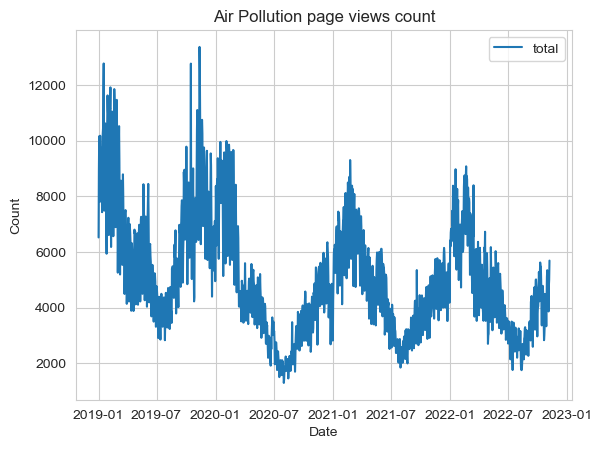

In [175]:
#sns.lineplot(y=airpol_views.en, x=airpol_views.date)
#sns.lineplot(y=airpol_views.da, x=airpol_views.date)
sns.lineplot(y=airpol_data.total, x=airpol_data.date)
plt.title("Air Pollution page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()

<AxesSubplot:xlabel='date', ylabel='fr'>

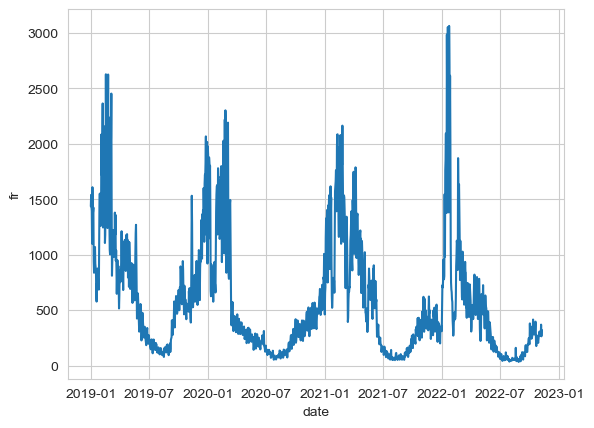

In [181]:
sns.lineplot(y=airpol_data.fr, x=airpol_data.date)

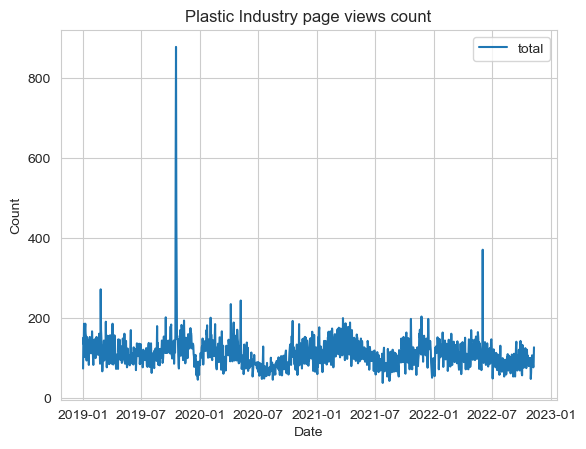

In [176]:
sns.lineplot(y=plastin_data.total, x=plastin_data.date)
plt.title("Plastic Industry page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()

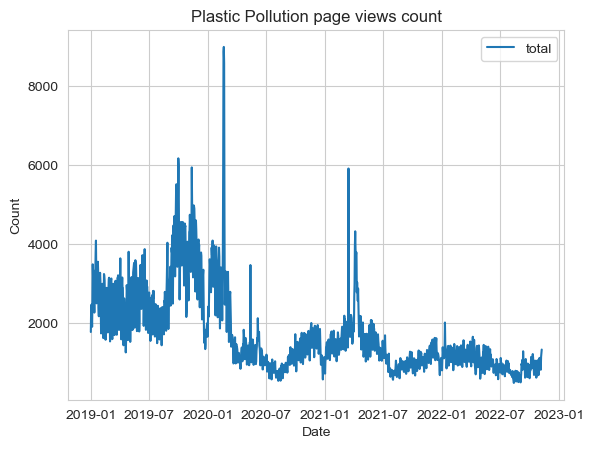

In [177]:
sns.lineplot(y=plastpol_data.total, x=plastpol_data.date)
plt.title("Plastic Pollution page views count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(['total'])
plt.show()